In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import HTML
import numpy
import re
import time
from scipy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pylunar
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sn

In [3]:
def spines(ax=None):
    if ax is None:
        ax = plt.gca()
    dict(ax.spines.items())["left"].set_position(('outward', 10))
    dict(ax.spines.items())["bottom"].set_position(('outward', 10))
    dict(ax.spines.items())["top"].set_position(('outward', 10))
    dict(ax.spines.items())["right"].set_position(('outward', 10))
    
def annotate_distance(ax, text, point1, point2, linestyle, fontsize, textoffset = (0.1,0)):
    ax.annotate('', point1, point2, \
            arrowprops={'arrowstyle':'<->', 'linestyle':linestyle, "facecolor":"black"}, fontsize=fontsize);
    ax.annotate(text, point1, (0.5*(point1[0]+point2[0])+textoffset[0], 0.5*(point1[1]+point2[1])+textoffset[1]),
                fontsize=fontsize)

In [79]:
#plt.rcParams["text.usetex"] =True

# Data extraction

In [238]:
filename = 'manual.txt'                    #5-9 Magnitude
#filename = 'manual2.txt'                   #4-5 Magnitude
#filename = 'manual_2020.txt'               #2020 4-5 Magnitude

In [239]:
with open(filename, 'r') as f:
    cases = f.readlines()

In [240]:
time = []
mag = []
for i in cases:
    time.append(datetime.datetime(int((i.split())[0]), int((i.split())[1]), int((i.split())[2]), int((i.split())[3]), int((i.split())[4]), 0, 0))
    mag.append(float((i.split())[8]))

In [241]:
#filename = 'manual.txt'  
#with open(filename, 'r') as f:
#    cases = f.readlines()
#for i in cases:
#    time.append(datetime.datetime(int((i.split())[0]), int((i.split())[1]), int((i.split())[2]), int((i.split())[3]), int((i.split())[4]), 0, 0))
#    mag.append(float((i.split())[8]))

# Data for analisis

In [261]:
mi = pylunar.MoonInfo((26, 33, 44), (127, 80, 56), name='Okinawa') 

phase = []
age = []
altitude = []
declination = []
elongation = []

for i in time:
    mi.update(i)                                                # Update the moon information based on time.
    phase.append(round(float(mi.fractional_phase()), 5))        # The moon's fractional illumination.
    age.append(mi.age())                                        # The moon's age in days.
    altitude.append(mi.altitude())                              # The moon's altitude in degrees.
    declination.append(mi.dec())                                # The moon's declination in degrees.
    elongation.append(mi.elongation())                          # The moon's elongation from the sun in degrees.

# Plotting

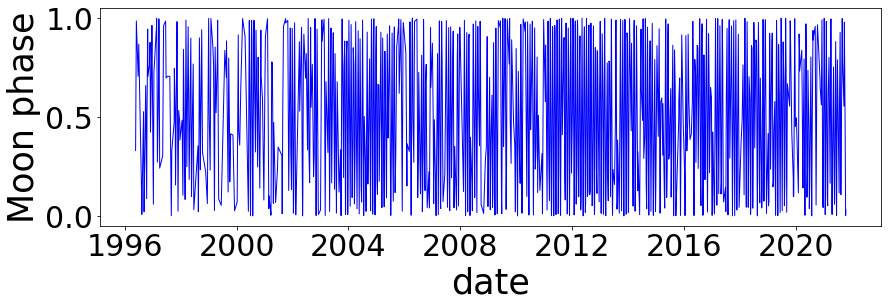

In [264]:
fig, axes = plt.subplots(1,1,figsize=(14, 4))
p = axes.plot(time, phase, 'b', linewidth=1.0)
#p = axes.plot(time, age, 'r', linewidth=1.0)
#p = axes.plot(time, altitude, 'g', linewidth=1.0)
#p = axes.plot(time, declination, 'g', linewidth=1.0)
#p = axes.plot(time, elongation, 'g', linewidth=1.0)
axes.set_xlabel(r'date', fontsize=35)
axes.set_ylabel(r'Moon phase', fontsize=35)
axes.tick_params(axis='x', labelsize=30)
axes.tick_params(axis='y', labelsize=30)

# Looking for correlations

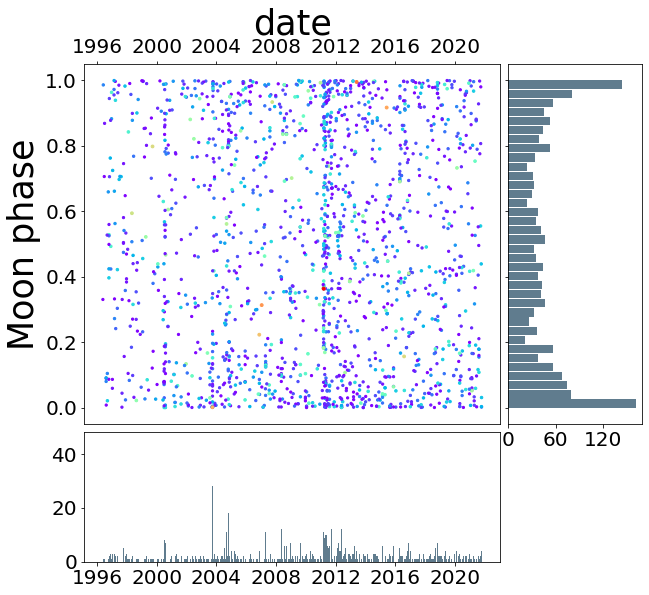

In [244]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(time, phase, s = mag, c  = mag, cmap='rainbow')
ax_scatter.set_xlabel(r'date', fontsize=35)
ax_scatter.set_ylabel(r'Moon phase', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(phase, orientation = 'horizontal', bins=36, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(time, bins=1000, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

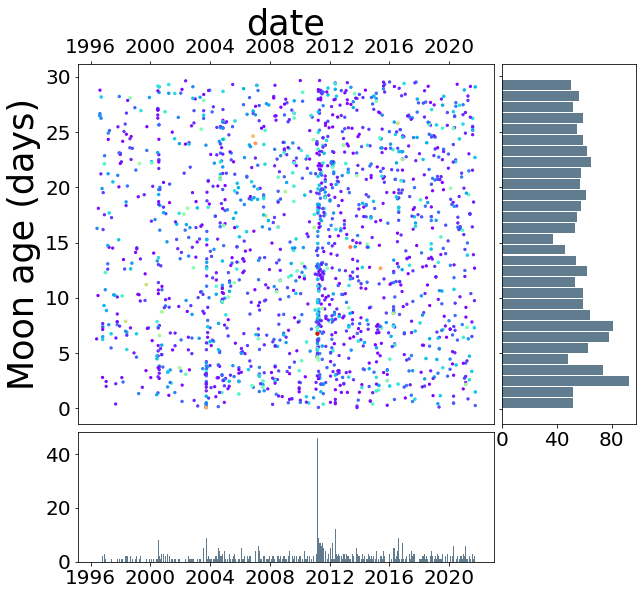

In [245]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(time, age, s = mag, c  = mag, cmap='rainbow')
ax_scatter.set_xlabel(r'date', fontsize=35)
ax_scatter.set_ylabel(r'Moon age (days)', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(age, orientation = 'horizontal', bins=30, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(time, bins=1000, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

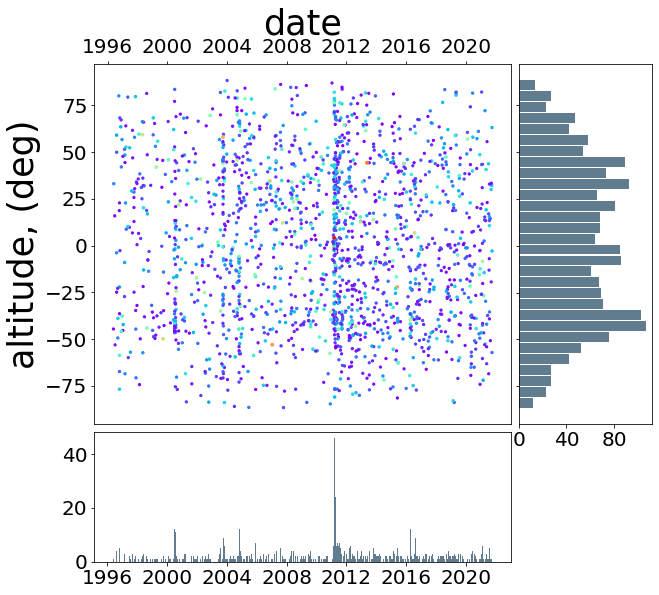

In [267]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(time, altitude, s = mag, c  = mag, cmap='rainbow')
ax_scatter.set_xlabel(r'date', fontsize=35)
ax_scatter.set_ylabel(r'altitude, (deg)', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(altitude, orientation = 'horizontal', bins=30, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(time, bins=1000, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

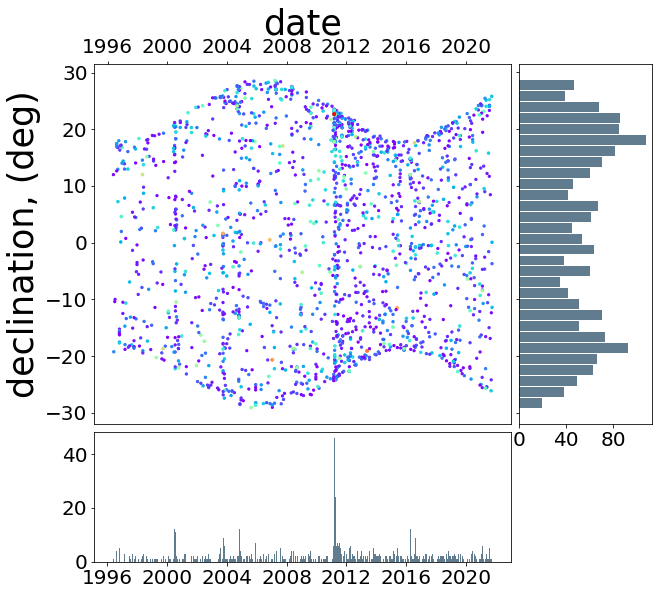

In [266]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(time, declination, s = mag, c  = mag, cmap='rainbow')
ax_scatter.set_xlabel(r'date', fontsize=35)
ax_scatter.set_ylabel(r'declination, (deg)', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(declination, orientation = 'horizontal', bins=30, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(time, bins=1000, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

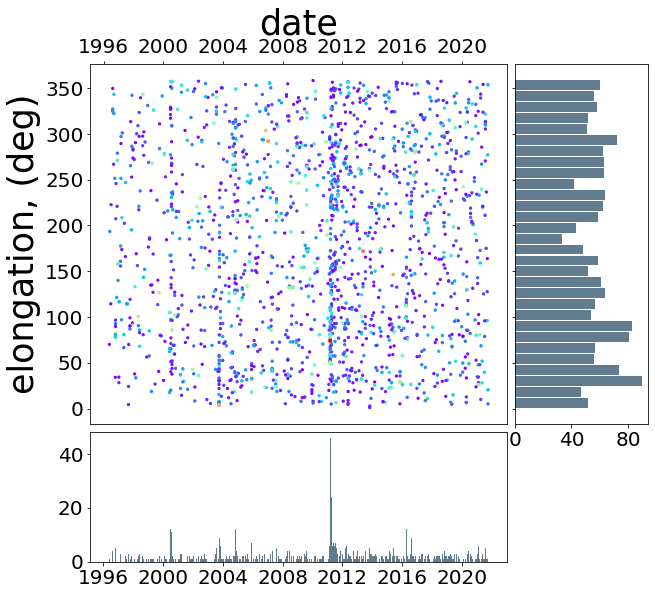

In [268]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(time, elongation, s = mag, c  = mag, cmap='rainbow')
ax_scatter.set_xlabel(r'date', fontsize=35)
ax_scatter.set_ylabel(r'elongation, (deg)', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(elongation, orientation = 'horizontal', bins=30, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(time, bins=1000, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

# Correlation matrix

In [269]:
data = {'Time': time,
        'Magnitude': mag,
        'Moon phase': phase,
        'Moon age': age,
        'Altitude': altitude,
        'Declination': declination,
        'Elongation': elongation
        }

df = pd.DataFrame(data,columns=['Time','Magnitude','Moon phase','Moon age','Altitude','Declination','Elongation'])
print (df)

                    Time  Magnitude  Moon phase   Moon age   Altitude  \
0    2021-10-07 22:41:00        6.1     0.03091   1.483079  -2.847715   
1    2021-10-06 17:13:00        5.5     0.00189   0.255302 -57.188132   
2    2021-10-06 02:46:00        6.0     0.00309  29.079353  63.137545   
3    2021-09-29 17:37:00        6.1     0.43922  22.698103  32.264127   
4    2021-09-19 17:18:00        5.0     0.98027  12.684909  33.411882   
...                  ...        ...         ...        ...        ...   
1770 1996-08-11 03:12:00        5.9     0.09110  26.456370  59.095903   
1771 1996-07-04 03:59:00        5.1     0.86878  18.099463 -53.087041   
1772 1996-06-26 06:37:00        5.0     0.70629  10.209185  15.916252   
1773 1996-06-02 18:37:00        5.7     0.98627  16.285291  33.114533   
1774 1996-05-23 18:36:00        5.0     0.33058   6.284596 -44.583298   

      Declination  Elongation  
0      -11.415003   20.338461  
1       -3.724006    5.032816  
2        0.058461  353.7407

In [270]:
corrMatrix = df.corr()
print (corrMatrix)

             Magnitude  Moon phase  Moon age  Altitude  Declination  \
Magnitude     1.000000    0.001089  0.000447  0.055716     0.071946   
Moon phase    0.001089    1.000000  0.026920 -0.044699    -0.109843   
Moon age      0.000447    0.026920  1.000000 -0.028868    -0.006811   
Altitude      0.055716   -0.044699 -0.028868  1.000000     0.219021   
Declination   0.071946   -0.109843 -0.006811  0.219021     1.000000   
Elongation   -0.001954    0.028383  0.998535 -0.032423    -0.011574   

             Elongation  
Magnitude     -0.001954  
Moon phase     0.028383  
Moon age       0.998535  
Altitude      -0.032423  
Declination   -0.011574  
Elongation     1.000000  


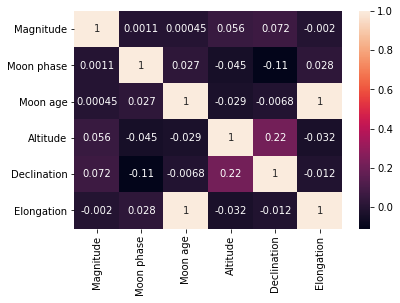

In [271]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

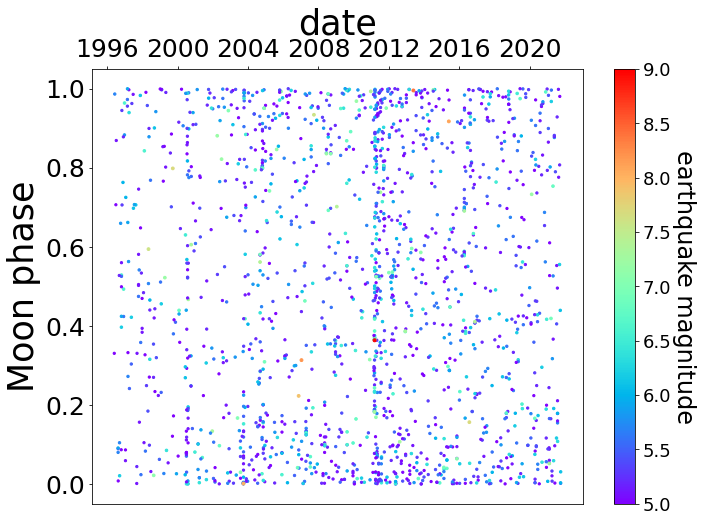

In [202]:
fig, axes = plt.subplots(1,1,figsize=(11, 8))

p = plt.scatter(time, phase, s = mag, c  = mag, cmap='rainbow')

axes.set_xlabel(r'date', fontsize=35)
axes.set_ylabel(r'Moon phase', fontsize=35)

axes.tick_params(axis='x', labelsize=25)
axes.tick_params(axis='y', labelsize=25)
axes.xaxis.tick_top()  
axes.xaxis.set_label_position('top') 

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'earthquake magnitude', labelpad=25, rotation=270, fontsize=24)
cb.ax.tick_params(labelsize=18) 

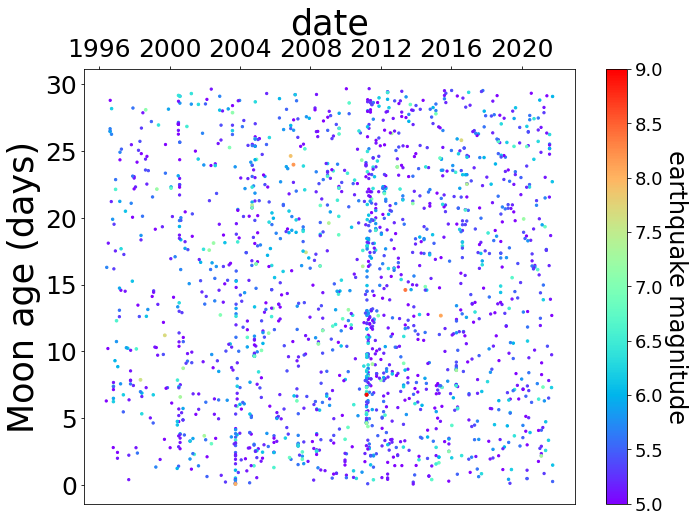

In [203]:
fig, axes = plt.subplots(1,1,figsize=(11, 8))

p = plt.scatter(time, age, s = mag, c  = mag, cmap='rainbow')

axes.set_xlabel(r'date', fontsize=35)
axes.set_ylabel(r'Moon age (days)', fontsize=35)

axes.tick_params(axis='x', labelsize=25)
axes.tick_params(axis='y', labelsize=25)
axes.xaxis.tick_top()  
axes.xaxis.set_label_position('top') 

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'earthquake magnitude', labelpad=25, rotation=270, fontsize=24)
cb.ax.tick_params(labelsize=18) 

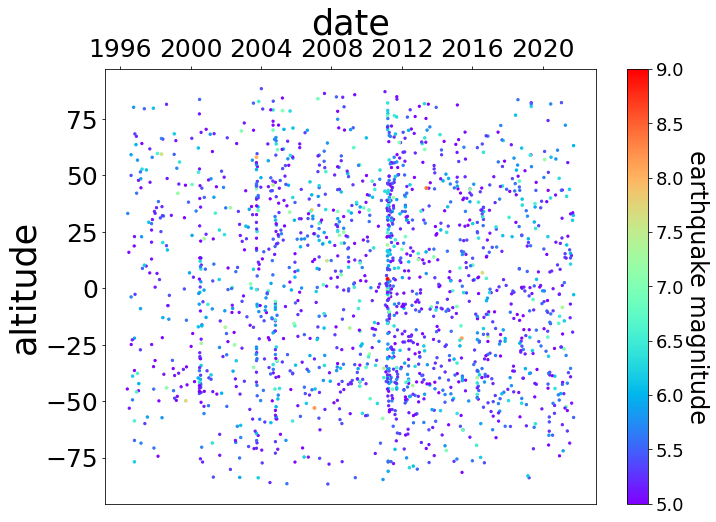

In [207]:
fig, axes = plt.subplots(1,1,figsize=(11, 8))

p = plt.scatter(time, altitude, s = mag, c  = mag, cmap='rainbow')

axes.set_xlabel(r'date', fontsize=35)
axes.set_ylabel(r'altitude', fontsize=35)

axes.tick_params(axis='x', labelsize=25)
axes.tick_params(axis='y', labelsize=25)
axes.xaxis.tick_top()  
axes.xaxis.set_label_position('top') 

cb = fig.colorbar(p, ax=axes)
cb.set_label(r'earthquake magnitude', labelpad=25, rotation=270, fontsize=24)
cb.ax.tick_params(labelsize=18) 

# Moon Phase

In [145]:
time[4006]

datetime.datetime(2007, 6, 24, 14, 57)

In [146]:
mi.update(time[4006])

In [147]:
mi.age()

9.48879245371063

In [148]:
mi.fractional_phase()

0.6928344963172414

In [150]:
mi.altitude()

-30.1195018245446

In [33]:
help(pylunar.MoonInfo)

Help on class MoonInfo in module pylunar.moon_info:

class MoonInfo(builtins.object)
 |  MoonInfo(latitude, longitude, name=None)
 |  
 |  Handle all moon information.
 |  
 |  Attributes
 |  ----------
 |  observer : ephem.Observer instance.
 |      The instance containing the observer's location information.
 |  moon : ephem.Moon instance
 |      The instance of the moon object.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, latitude, longitude, name=None)
 |      Initialize the class.
 |      
 |      Parameters
 |      ----------
 |      latitude : tuple of 3 ints
 |          The latitude of the observer.
 |      longitude : tuple of 3 ints
 |          The longitude of the observer.
 |      name : str, optional
 |          A name for the observer's location.
 |  
 |  age(self)
 |      The moon's age in days.
 |      
 |      Returns
 |      -------
 |      float
 |  
 |  altitude(self)
 |      The moon's altitude in degrees.
 |      
 |      Returns
 |      -------
 |      

In [44]:
datetime.datetime(2021,10,12,23,59,59) - datetime.datetime(1996,1,1,0,0,1)

datetime.timedelta(days=9416, seconds=86398)

In [248]:
x = pd.date_range(datetime.datetime(1996,1,1,0,0,1), datetime.datetime(2021,12,31,23,59,59), periods=36500).to_pydatetime()

In [272]:
ages   = []
phases = []
altitudes = []
declinations = []
elongations = []

for i in x:
    mi.update(i)
    ages.append(mi.age())
    phases.append(mi.fractional_phase())
    altitudes.append(mi.altitude())
    declinations.append(mi.dec())
    elongations.append(mi.elongation())

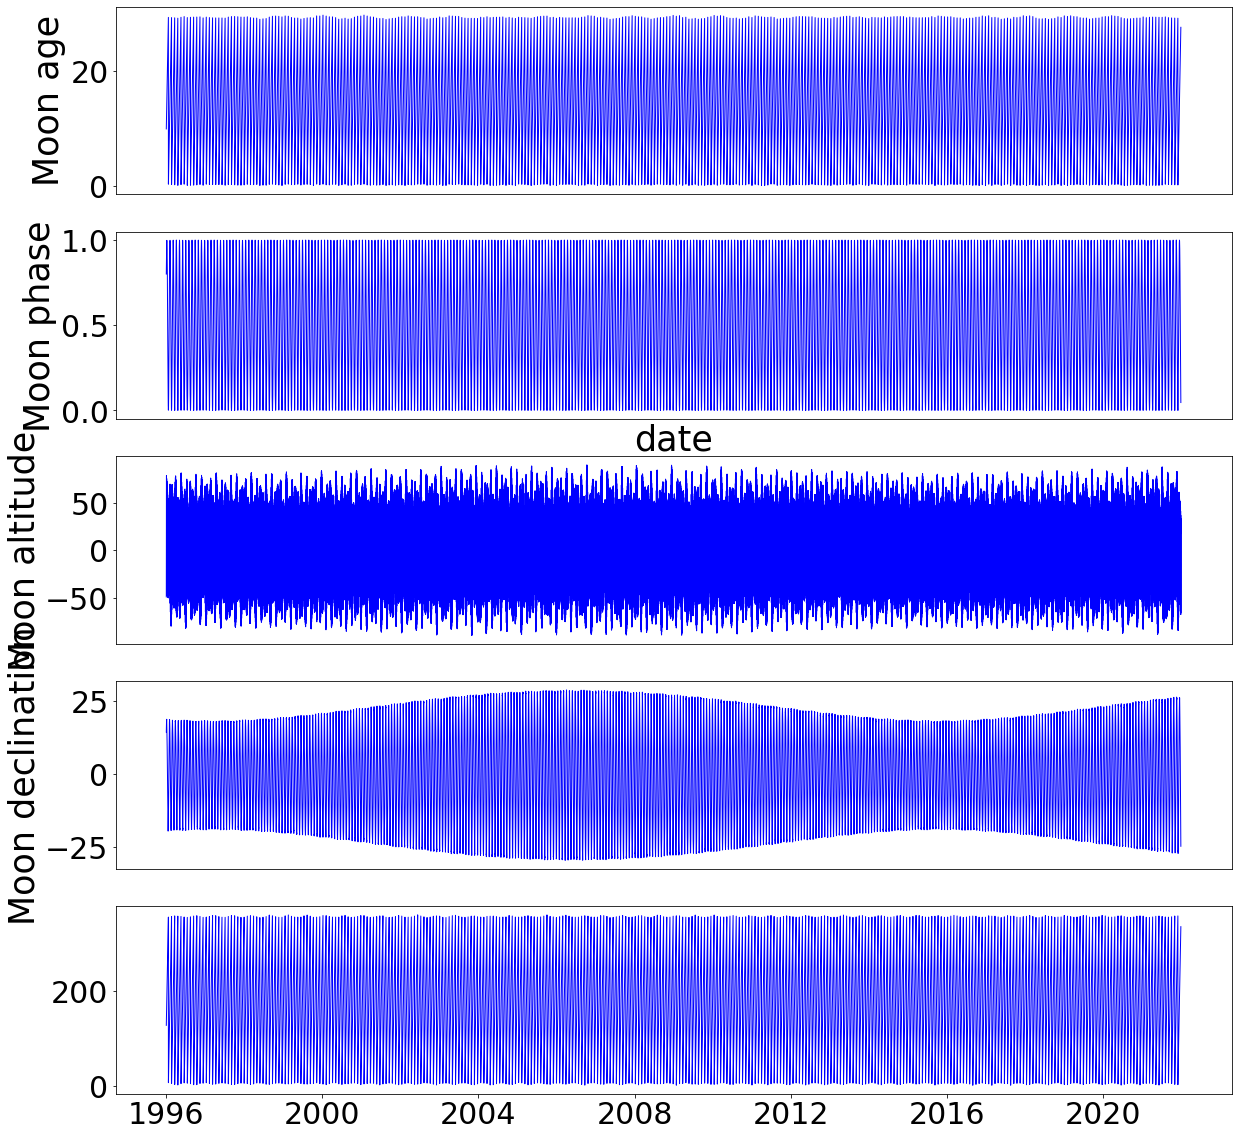

In [273]:
fig, axes = plt.subplots(5,1,figsize=(20, 20))
p = axes[0].plot(x, ages, 'b', linewidth=1.0)
p = axes[1].plot(x, phases, 'b', linewidth=1.0)
p = axes[2].plot(x, altitudes, 'b', linewidth=1.0)
p = axes[3].plot(x, declinations, 'b', linewidth=1.0)
p = axes[4].plot(x, elongations, 'b', linewidth=1.0)
axes[1].set_xlabel(r'date', fontsize=35)
axes[0].set_ylabel(r'Moon age', fontsize=35)
axes[1].set_ylabel(r'Moon phase', fontsize=35)
axes[2].set_ylabel(r'Moon altitude', fontsize=35)
axes[3].set_ylabel(r'Moon declination', fontsize=35)
axes[4].tick_params(axis='x', labelsize=30)
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[2].set_xticks([])
axes[3].set_xticks([])
axes[0].tick_params(axis='y', labelsize=30)
axes[1].tick_params(axis='y', labelsize=30)
axes[2].tick_params(axis='y', labelsize=30)
axes[3].tick_params(axis='y', labelsize=30)
axes[4].tick_params(axis='y', labelsize=30)

#axes[0].set_ylim(29,30)
#axes[1].set_ylim(0.0,0.01)

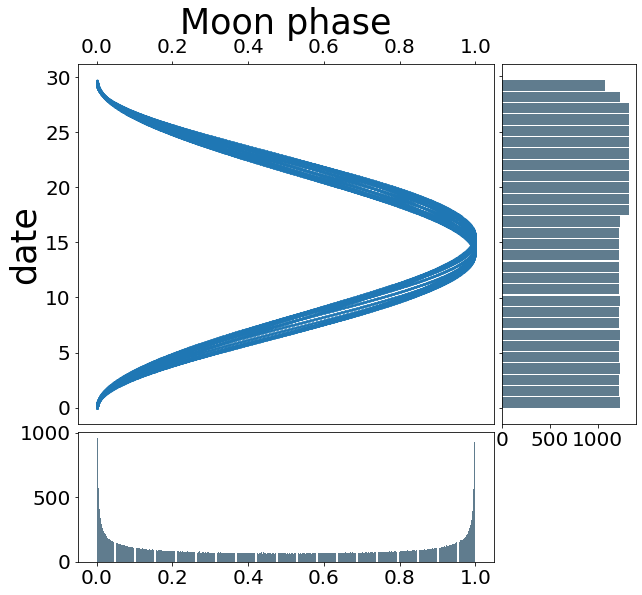

In [229]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(phases, ages, s = 1)
ax_scatter.set_xlabel(r'Moon phase', fontsize=35)
ax_scatter.set_ylabel(r'date', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(ages, orientation = 'horizontal', bins=29, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(phases, bins=360, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

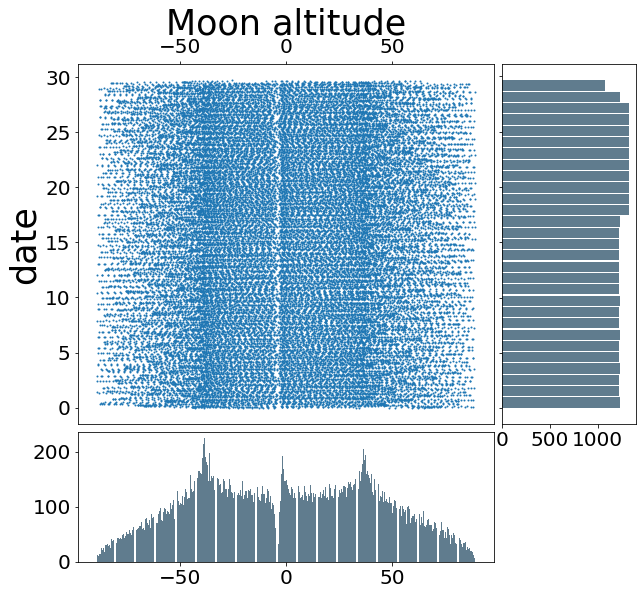

In [235]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(altitudes, ages, s = 1)
ax_scatter.set_xlabel(r'Moon altitude', fontsize=35)
ax_scatter.set_ylabel(r'date', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(ages, orientation = 'horizontal', bins=29, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(altitudes, bins=360, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

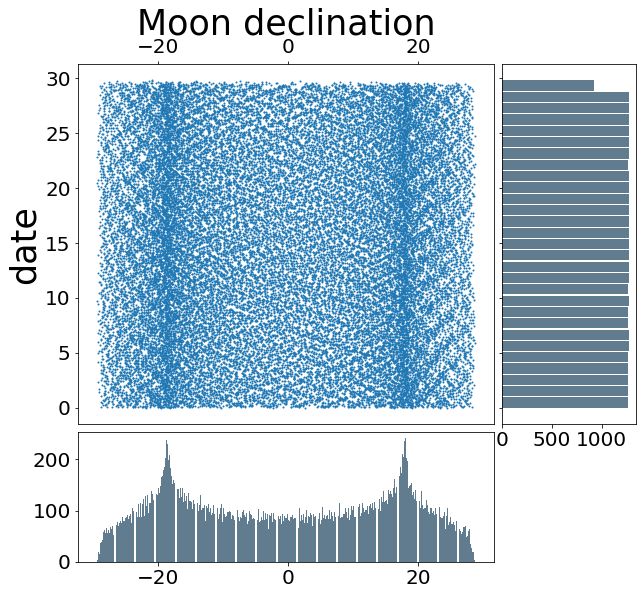

In [251]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(declinations, ages, s = 1)
ax_scatter.set_xlabel(r'Moon declination', fontsize=35)
ax_scatter.set_ylabel(r'date', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(ages, orientation = 'horizontal', bins=29, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(declinations, bins=360, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()

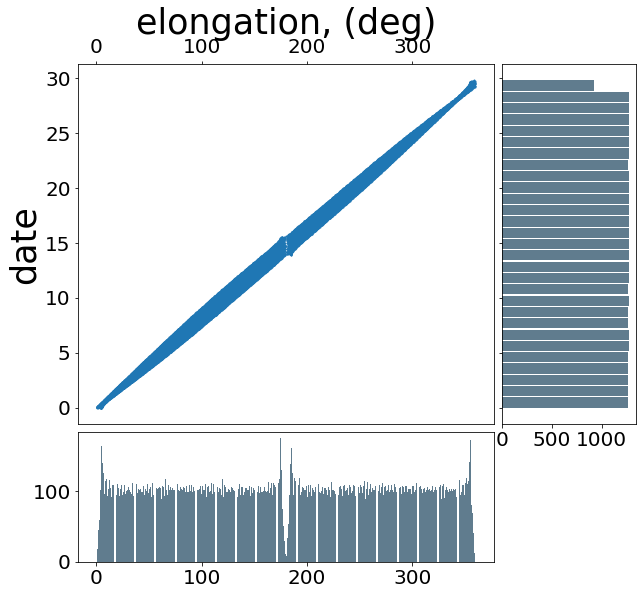

In [275]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(12, 12)

ax_scatter = fig.add_subplot(gs[1:9, 0:9])
ax_hist_x = fig.add_subplot(gs[1:9, 9:12])
ax_hist_y = fig.add_subplot(gs[9:12, 0:9])

ax_scatter.scatter(elongations, ages, s = 1)
ax_scatter.set_xlabel(r'elongation, (deg)', fontsize=35)
ax_scatter.set_ylabel(r'date', fontsize=35)
ax_scatter.tick_params(axis='x', labelsize=20)
ax_scatter.tick_params(axis='y', labelsize=20)
ax_scatter.xaxis.tick_top()
ax_scatter.xaxis.set_label_position('top') 

ax_hist_x.hist(ages, orientation = 'horizontal', bins=29, rwidth=0.9, color='#607c8e')
ax_hist_x.tick_params(axis='x', labelsize=20)
ax_hist_x.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_hist_y.hist(elongations, bins=360, rwidth=0.9, color='#607c8e')
ax_hist_y.tick_params(axis='y', labelsize=20)
ax_hist_y.tick_params(axis='x', labelsize=20)
#ax_hist_y.xaxis.set_major_locator(plt.MaxNLocator(7))

nullfmt = NullFormatter() 
ax_hist_x.yaxis.set_major_formatter(nullfmt)

plt.show()